In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmath

  
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:
data=data.rename(columns={"Delivery Time":"DT","Sorting Time":"ST"})
data

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


# 0.825997 is good correlation

Text(0, 0.5, 'Delivery time')

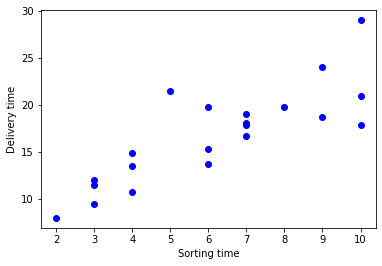

In [4]:
plt.scatter(x=data.ST, y=data.DT, color='blue')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

{'whiskers': [<matplotlib.lines.Line2D at 0x237d434d670>,
 'caps': [<matplotlib.lines.Line2D at 0x237d434dd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x237d434d310>],
 'medians': [<matplotlib.lines.Line2D at 0x237d435b430>],
 'fliers': [<matplotlib.lines.Line2D at 0x237d435b790>],
 'means': []}

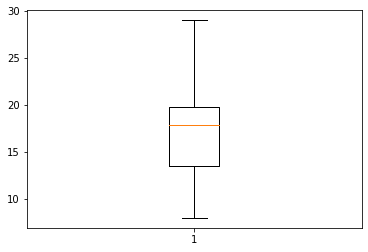

In [5]:
plt.boxplot(data.DT)

{'whiskers': [<matplotlib.lines.Line2D at 0x237d43aeb50>,
 'caps': [<matplotlib.lines.Line2D at 0x237d43bb250>,
 'boxes': [<matplotlib.lines.Line2D at 0x237d43ae7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x237d43bb910>],
 'fliers': [<matplotlib.lines.Line2D at 0x237d43bbc70>],
 'means': []}

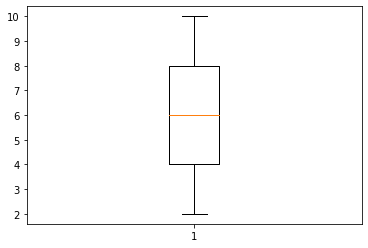

In [6]:
plt.boxplot(data.ST)

In [7]:
import pandas_profiling as pp
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='Delivery_time_report.html')

# Looking at the report, there is no need of any EDA related work. There are no outliers, duplicate values, so we can go ahead for model

In [8]:
import statsmodels.formula.api as smf
model1 = smf.ols("DT~ST",data = data).fit()

In [9]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        16:03:26   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
pred1 = model1.predict(data.iloc[:,1])
pred1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [11]:
rmse1 = np.sqrt(np.mean((np.array(data['DT'])-np.array(pred1))**2))
rmse1

2.7916503270617654

# R²  is 0.68 < 0.75 , so let's try to rebuild new model using log(x) transformation to get greater R² and lower RMSE


In [12]:
model2 = smf.ols("DT~np.log(ST)",data = data).fit()

In [13]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           2.64e-06
Time:                        16:03:26   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
pred2 = model2.predict(data.iloc[:,1])
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [15]:
rmse2 = np.sqrt(np.mean((np.array(data['DT'])-np.array(pred2))**2))
rmse2

2.733171476682066

# R²  is 0.7 < 0.75 , so let's try to rebuild new model using log(y) transformation to get greater R² and lower RMSE

In [44]:
model3 = smf.ols("np.log(DT)~np.log(ST)",data = data).fit()

In [45]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           1.60e-07
Time:                        16:36:32   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(ST)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
pred3 = model3.predict(data.iloc[:,1])
pred3_exp = np.exp(pred3) # to remove log of y
pred3_exp

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64

In [27]:
rmse3 = np.sqrt(np.mean((np.array(data['DT'])-np.array(pred3_exp))**2))
rmse3

2.7458288976145497

In [47]:
pred3_exp.corr(data['DT'])

0.833146471643729

Text(0, 0.5, 'Delivery Time')

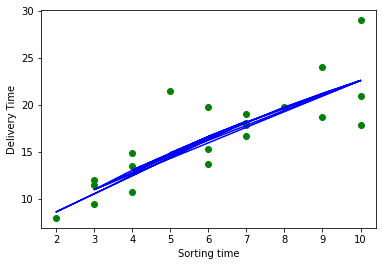

In [48]:
plt.scatter(x=data['ST'],y=data['DT'],color='green')
plt.plot(data['ST'],pred3_exp,color='blue')
plt.xlabel('Sorting time')
plt.ylabel('Delivery Time')


In [49]:
resid = model3.resid_pearson 
resid

array([-0.47042351,  0.20765416,  1.09439452,  0.79040191,  1.600765  ,
       -0.52289568,  0.25492302, -0.94417959, -1.49533389, -0.79366223,
        0.01730048, -1.2540012 , -0.58073428,  0.28179324,  0.57091402,
        0.83219556, -1.22924105, -0.05292349, -0.49227806, -0.15290982,
        2.3382409 ])

Text(0, 0.5, 'Standardized Residual')

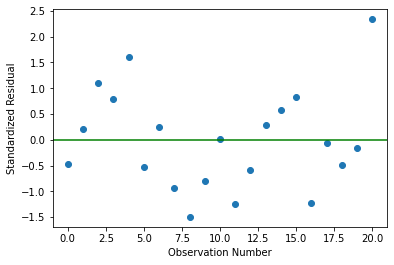

In [50]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

So we can consider model3 as the final

In [30]:
newdata=pd.Series([20,15,11])

In [34]:
data_pred=pd.DataFrame(newdata,columns=['ST'])

In [35]:
data_pred

,ST
0,20
1,15
2,11


In [52]:
data_final = np.exp(model3.predict(data_pred))
data_final

0    34.192421
1    28.792287
2    23.921630
dtype: float64

For Sorting time values of 20,15,11 we get the Delivery time predicted values as 34.2, 28.8 and 23.9 respectively.
 